In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

C:\Users\utkar\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
IMAGE_SIZE = [256, 256]
BATCH_SIZE = 32
CHANNELS = 3

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantImages",
    shuffle = True,
    image_size = (IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [4]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [5]:
len(dataset)

68

(32, 256, 256, 3)
[1 1 0 0 2 0 1 0 1 0 1 1 1 1 1 0 1 1 0 1 1 1 0 0 0 1 1 0 1 0 1 0]

 
 

tf.Tensor(
[[[129. 121. 134.]
  [123. 115. 128.]
  [116. 108. 121.]
  ...
  [ 99.  89. 100.]
  [ 99.  89. 100.]
  [ 96.  86.  97.]]

 [[117. 109. 122.]
  [116. 108. 121.]
  [115. 107. 120.]
  ...
  [ 90.  80.  91.]
  [ 94.  84.  95.]
  [ 96.  86.  97.]]

 [[112. 104. 117.]
  [112. 104. 117.]
  [112. 104. 117.]
  ...
  [ 85.  75.  86.]
  [ 91.  81.  92.]
  [ 94.  84.  95.]]

 ...

 [[150. 140. 149.]
  [150. 140. 149.]
  [149. 139. 148.]
  ...
  [141. 131. 142.]
  [140. 130. 141.]
  [140. 130. 141.]]

 [[148. 138. 147.]
  [148. 138. 147.]
  [148. 138. 147.]
  ...
  [141. 131. 142.]
  [140. 130. 141.]
  [138. 128. 139.]]

 [[147. 137. 146.]
  [147. 137. 146.]
  [147. 137. 146.]
  ...
  [139. 129. 140.]
  [136. 126. 137.]
  [133. 123. 134.]]], shape=(256, 256, 3), dtype=float32)

 
 



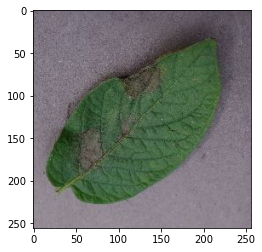

In [6]:
for images, labels in dataset.take(1):
    print(images.shape)
    print(labels.numpy())
    print("\n \n \n")
    print(images[0])
    
    print("\n \n \n")
    plt.imshow(images[0].numpy().astype('uint8'))

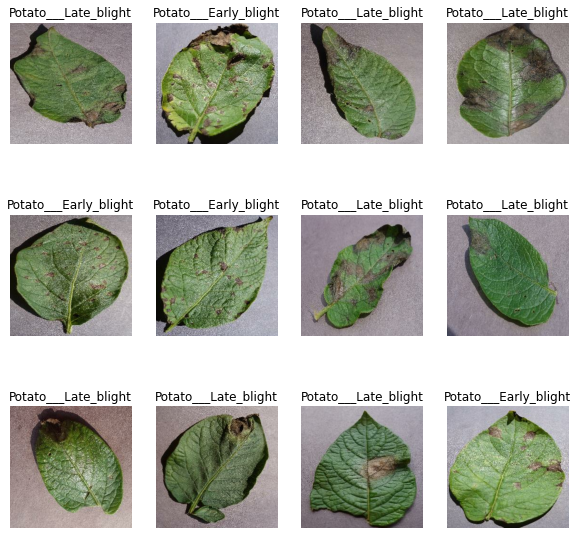

In [10]:
plt.figure(figsize=(10,10))
for images, labels in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(class_names[labels[i]])
        plt.axis('off')
        

In [33]:
def dataset_partition(dataset, train_size=0.8, test_size = 0.1, validate_size=0.1, shuffle = True, shuffle_size = 10000):
    assert (train_size + test_size + validate_size) == 1
    if shuffle:
        dataset = dataset.shuffle(shuffle_size, seed = 12)
    train_ds = dataset.take(int(len(dataset)*train_size))
    test = dataset.skip(int(len(dataset)*train_size))
    test_ds = test.take(9)
    val_ds = test.skip(9)
    return train_ds, test_ds, val_ds
train_ds, test_ds, val_ds = dataset_partition(dataset)
print(len(train_ds),"  ", "   ", len(test_ds), "   ", len(val_ds))

54        9     5


In [34]:
# Prefetching and caching of the dataset

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [37]:
# Rendering the image of the datasets
resize_n_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(256,256),
    layers.experimental.preprocessing.Rescaling(1.0/255)
]
)

In [39]:
# Data Augmentation

data_augmentation =  tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

### Model Building

In [45]:
# Scratching of the model layers 

# Model Architecture
model = models.Sequential([
    resize_n_rescale,
    data_augmentation,
    layers.Conv2D(32,kernel_size = (3,3), activation = 'relu', input_shape=(BATCH_SIZE,256,256,CHANNELS)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(3, activation = 'softmax')
]
)
model.build(input_shape=(BATCH_SIZE,256,256,CHANNELS))

In [46]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_2 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d_18 (Conv2D)          (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_18 (MaxPooli  (32, 127, 127, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_19 (Conv2D)          (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_19 (MaxPooli  (32, 62, 62, 64)          0         
 ng2D)                                                

In [48]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
    metrics = ['accuracy'],
)

In [50]:
# Fitting the Data Set in the Model

history = model.fit(
    train_ds,
    batch_size = BATCH_SIZE,
    validation_data = val_ds,
    verbose = 1,
    epochs = 50,
    
)

Epoch 1/50
54/54 [==============================] - 135s 2s/step - loss: 0.9314 - accuracy: 0.4583 - val_loss: 0.8943 - val_accuracy: 0.7063
Epoch 2/50
54/54 [==============================] - 151s 3s/step - loss: 0.7899 - accuracy: 0.6279 - val_loss: 0.6469 - val_accuracy: 0.7125
Epoch 3/50
54/54 [==============================] - 139s 3s/step - loss: 0.5192 - accuracy: 0.7737 - val_loss: 0.7072 - val_accuracy: 0.7375
Epoch 4/50
54/54 [==============================] - 134s 2s/step - loss: 0.3954 - accuracy: 0.8391 - val_loss: 0.4048 - val_accuracy: 0.8313
Epoch 5/50
54/54 [==============================] - 140s 3s/step - loss: 0.3049 - accuracy: 0.8860 - val_loss: 0.3704 - val_accuracy: 0.8500
Epoch 6/50
54/54 [==============================] - 121s 2s/step - loss: 0.2286 - accuracy: 0.9086 - val_loss: 0.6460 - val_accuracy: 0.7688
Epoch 7/50
54/54 [==============================] - 127s 2s/step - loss: 0.2138 - accuracy: 0.9068 - val_loss: 0.2475 - val_accuracy: 0.9000
Epoch 8/50
54

In [51]:
score = model.evaluate(test_ds)

9/9 [==============================] - 5s 326ms/step - loss: 0.1249 - accuracy: 0.9653


In [53]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training ans validation loss')

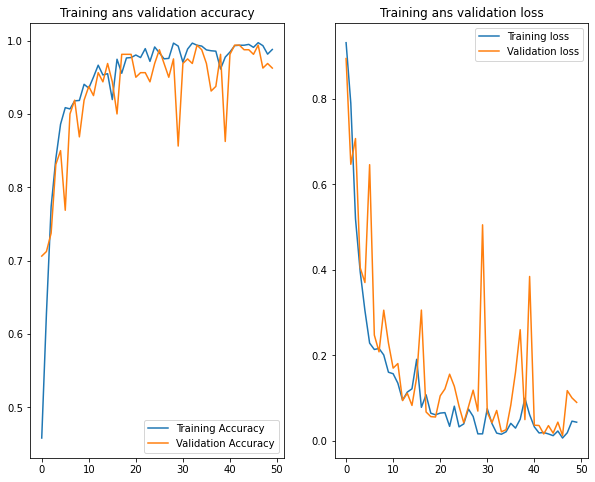

In [54]:
plt.figure(figsize = (10,8))
plt.subplot(1,2,1)
plt.plot(range(50), acc, label='Training Accuracy')
plt.plot(range(50), val_acc, label='Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training ans validation accuracy')

plt.subplot(1,2,2)
plt.plot(range(50), loss, label='Training loss')
plt.plot(range(50), val_loss, label='Validation loss')
plt.legend(loc = 'upper right')
plt.title('Training ans validation loss')


## Prediction

 First Image to predict !--
Actual label:  Potato___Late_blight
1/1 [==============================] - 0s 423ms/step
Predicted label:   Potato___Late_blight


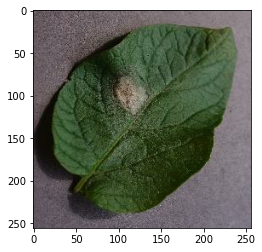

In [61]:
import numpy as np
for images_batch, label_batch in test_ds.take(1):
    first_image = images_batch[0].numpy().astype('uint8')
    print(' First Image to predict !--')
    plt.imshow(first_image)
    print('Actual label: ', class_names[label_batch[0].numpy()])
    batch_prediction = model.predict(images_batch)
    print('Predicted label:  ', class_names[np.argmax(batch_prediction[0])])

In [64]:
def predict(model,img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array,0)
    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions[0])] 
    confidence = round(100*(np.max(predictions[0])), 2)
    return predicted_class, confidence
    

1/1 [==============================] - 0s 100ms/step


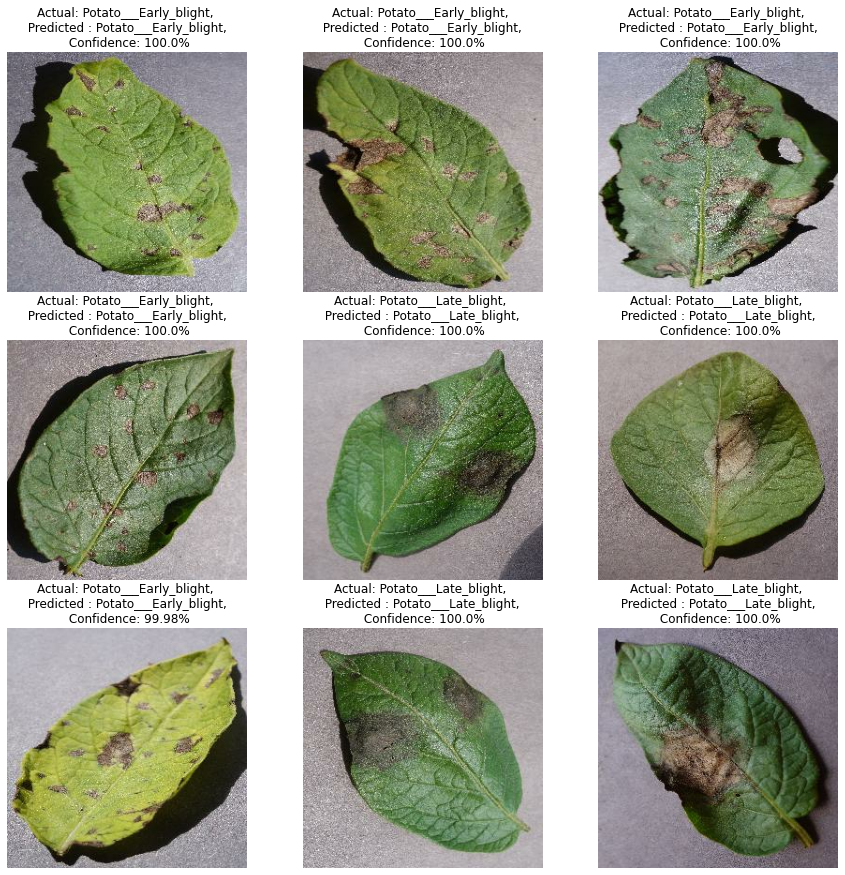

In [69]:
plt.figure(figsize = (15,15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[labels[i]]
        plt.title(f'Actual: {actual_class}, \n Predicted : {predicted_class}, \n Confidence: {confidence}%')
        plt.axis('off')

In [79]:
import os
model_version = max([int(i) for i in (os.listdir("../models")+[0])]) + 1
model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/3\assets


INFO:tensorflow:Assets written to: ../models/3\assets
